In [4]:
%load_ext autoreload
%autoreload 2
%aimport
# %reload_ext autoreload

import sys 
from os.path import abspath
path = abspath('..')

if path not in sys.path: 
    sys.path.insert(0, path)
path

import numpy as np
import matplotlib.pyplot as plt 
import re 

from relaxed import utils 
from relaxed.frames import params
from relaxed.progenitors import progenitors



# Try to extract

In [5]:
prog_file = '/home/imendoza/alcca/nbody-relaxed/data/trees_bolshoi/progenitors.txt'

In [25]:
prog_generator = progenitors.get_prog_lines_generator(prog_file)
# there are like 382474 main lines (in the filtered version)

In [7]:
count = 0
for prog in prog_generator: 
    count+=1
    if count %10000 == 0: 
        print(count)
print(count)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
382474


# Sanity check coprogenitors

In [ ]:
# The largest haloes should have coprogenitors

In [143]:
prog_generator = progenitors.get_prog_lines_generator(prog_file)

In [144]:
mvirs = [] 
coprog_bool = []
for i, prog in enumerate(prog_generator):
    mvirs.append(prog.cat['mvir'][0])
    coprog_bool.append( (prog.cat['coprog_ids']>0).any())
    
    if i % 10000 == 0: 
        print(i)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000


3684


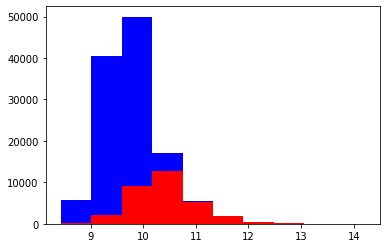

In [145]:
# what are the masses of these haloes. 
plt.hist(np.log10(mvirs), color='b')
plt.hist(np.log10(np.array(mvirs)[coprog_bool]), color='r')

# so many low mass haloes 
print(np.sum(np.log10(mvirs) > 11.130333768495007))

# note: 3684* 5 * 5 * 5 \approx what we have for total haloes. 

In [98]:
8995999744.0/4769999872.0

1.8859538753463514

In [94]:
8995999744.0/863000000.0

10.424101673232908

In [96]:
prog.get_a2()

0.62235

# Do an exponential fit 

In [84]:
from scipy.optimize import curve_fit

def func(x, alpha, b, c):
    return b * np.log10(alpha * x) + c

In [85]:
prog_generator = progenitors.get_prog_lines_generator(prog_file)
# there are like 382474 main lines (in the filtered version)
prog = next(prog_generator)

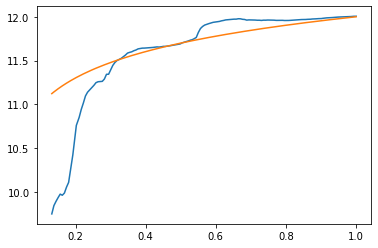

In [86]:
# should look log-like. 
plt.plot(prog.cat['scale'], np.log10(prog.cat['mvir']))

plt.plot(prog.cat['scale'], func(prog.cat['scale'], 1, 1, 12))

In [87]:
opt_params, _ = curve_fit(func, prog.cat['scale'], np.log10(prog.cat['mvir']), p0=(0.5, 1, 12))

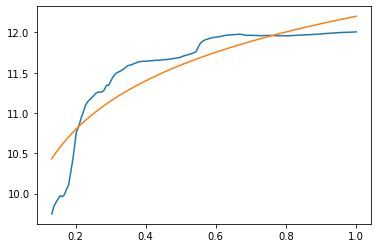

In [88]:
# now using opt-params. 
plt.plot(prog.cat['scale'], np.log10(prog.cat['mvir']))

plt.plot(prog.cat['scale'], func(prog.cat['scale'], *opt_params))

In [89]:
opt_params

array([ 1.97680615,  2.01309293, 11.60432845])

# Read the table produced and add to catalog 

In [18]:
from astropy.table import Table
from pathlib import Path 

from relaxed.frames import catalogs 

In [19]:
prog_table_file = '/home/imendoza/alcca/nbody-relaxed/data/trees_bolshoi/progenitors.csv'
table = Table.read(prog_table_file)

In [22]:
#load catalog we know and love (kindof)
cat_filepath = Path('/home/imendoza/alcca/nbody-relaxed/data/phils_catalogues/'
                    'halo_catalogues/Bolshoi/BolshoiP/minh/hlist_1.00000.minh')
name = 'BolshoiP'
hcat = catalogs.HaloCatalog(cat_filepath, name, verbose=True, extract_sub=False)
hcat.load_base_cat()

/home/imendoza/alcca/nbody-relaxed/relaxed/frames/catalogs.py:149: UserWarning: Ignoring dividing by zero and invalid errors that should be filtered out anyways.
  "Ignoring dividing by zero and invalid errors that should "


0


/home/imendoza/alcca/nbody-relaxed/relaxed/frames/catalogs.py:186: UserWarning: We only include parameters in `params.default_params_to_include`
  warnings.warn("We only include parameters in `params.default_params_to_include`")


In [23]:
cat = hcat._cat

In [29]:
cat = cat[cat.argsort('id')]
table = table[table.argsort('id')]

cat_ids = cat['id']
table_ids = table['id']


In [ ]:
sub_ok = sub_index < len(self.host_ids)
sub_ok[sub_ok] &= self.host_ids[sub_index[sub_ok]] == sub_pids[sub_ok]

out = np.ones(len(sub_index), dtype=int) * -1
out[sub_ok] = self.host_index[sub_index[sub_ok]]

In [31]:
cat_index = np.searchsorted(table_ids, cat_ids)
cat_index

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
#extract indices in table that appear in cat. 

sub_index = np.searchsorted(table_ids, cat_ids)

cat_ok = cat_ids['id'] < max(table_ids)
cat_ok = 

id,mvir,rvir,rs,xoff,voff,vrms,gamma_tdyn,gamma_inst,t/|u|,spin,scale_of_last_mm,cvir,eta,q,phi_l,x0,v0,f_sub,upid
int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64
2809249530,605600000000.0,171.988,12.556,3.01218,3.28,145.46,11.86,-20.14,0.5026,0.06796,0.7897,13.697675,1.0052,0.742085,1.695625,0.017513895,0.022549152,-1,-1
2809249552,167500000000.0,112.061,5.351,5.30413,3.12,90.45,-114.8,-45.78,0.4498,0.04938,0.2531,20.942066,0.8996,0.797215,2.3522663,0.047332525,0.034494195,-1,-1
2809249662,455600000000.0,156.421,3.647,1.57164,8.73,164.64,1.748,-22.89,0.5798,0.0323,0.9719,42.89032,1.1596,0.97353005,1.0574012,0.0100475,0.05302478,-1,-1
2809249670,225200000000.0,123.671,5.023,2.52312,5.01,110.27,3.6,9.155,0.5096,0.04036,0.1822,24.620945,1.0192,0.83640003,1.3845235,0.020401873,0.04543394,-1,-1
2809249768,1548000000000.0,235.171,17.784,23.909,11.58,216.61,-163.5,-347.9,0.62,0.05958,0.9036,13.223741,1.24,0.74376,1.3217182,0.10166644,0.053460136,-1,-1
2809249770,502700000000.0,161.637,11.573,7.16488,17.29,143.66,-27.84,0.9155,0.5622,0.02313,0.2328,13.966732,1.1244,0.754785,1.1819297,0.04432698,0.12035362,-1,-1
2809249815,164000000000.0,111.261,2.258,3.53559,2.33,112.27,-41.16,-21.06,0.5302,0.03618,0.896,49.27414,1.0604,0.81228,1.1695282,0.03177744,0.02075354,-1,-1
2809249821,221000000000.0,122.901,1.721,1.97347,3.64,129.9,-18.0,-3.662,0.4994,0.01156,0.2277,71.41255,0.9988,0.842015,1.2960479,0.016057396,0.028021557,-1,-1
2809249873,193500000000.0,117.589,5.884,3.65844,9.31,106.02,-7.384,-16.48,0.5376,0.04352,0.2733,19.984535,1.0752,0.827345,1.1903853,0.031112095,0.08781362,-1,-1
